# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Anju Anjannah
- **Email:** anjannahanju@gmail.com
- **ID Dicoding:** anjunjnnh

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan sepeda dalam beberapa tahun terakhir ?
- Pada jam berapa pengguna paling sering dan paling jarang menyewa sepeda ?
- Apakah ada pola khusus dalam perilaku pelanggan terkait dengan perubahan suhu dan kelembapan?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Memuat tabel day dan hour

### Assessing Data

- Menilai data day_df

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- Menilai data hour_df

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [11]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada missing value pada day_df dan hour_df
- Tidak juga terdapat data yang memiliki duplikat

### Cleaning Data

- Mengubah tipe data int menjadi category, baik di dataset day_df maupun hour_df
- Begitu juga, tipe data object pada dteday akan diganti menjadi datetime
- Menghapus kolom 'instant' dan 'workingday', karena tidak memiliki hubungan dan sudah terdapat kolom weekday
- Mengganti beberapa nama kolom pada dataset day_df dan hour_df

In [13]:
# Menghapus kolom 'instant' dan 'workingday'
day_df = day_df.drop(columns=['instant', 'workingday'])
hour_df = hour_df.drop(columns=['instant', 'workingday'])

In [14]:
# Mengubah tipe data object pada kolom 'dteday' menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [15]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset day_df
day_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week'}, inplace=True)
hour_df.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week'}, inplace=True)

In [16]:
columns = ['season', 'month', 'one_of_week', 'weathersit']

for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

In [17]:
# Mengubah tipe data int menjadi category
season_string = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

day_df['season'] = day_df['season'].map(season_string)
hour_df['season'] = hour_df['season'].map(season_string)

In [18]:
mnth_string = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

day_df['month'] = day_df['month'].map(mnth_string)
hour_df['month'] = hour_df['month'].map(mnth_string)

In [19]:
one_of_week_string = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

day_df['one_of_week'] = day_df['one_of_week'].map(one_of_week_string)
hour_df['one_of_week'] = hour_df['one_of_week'].map(one_of_week_string)

**Insight:**
- Telah menghapus kolom 'instant' dan 'workingday'
- Tipe data int telah menjadi category
- Tipe data object pada kolom dteday telah berubah menjadi datetime
- Beberapa nama kolom telah mudah dibaca

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [20]:
day_df.describe(include="all")

,dteday,season,year,month,holiday,one_of_week,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731,731.000000,731,731.000000,731,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,NaN,12,NaN,7,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,NaN,Jan,NaN,Sunday,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,NaN,62,NaN,105,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,0.500684,NaN,0.028728,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,0.000000,NaN,0.000000,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,0.000000,NaN,0.000000,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,1.000000,NaN,0.000000,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,1.000000,NaN,0.000000,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,1.000000,NaN,1.000000,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [21]:
# Jumlah nilai untuk variabel kategori
categorical_columns = ['season', 'year', 'month', 'one_of_week', 'weathersit']
value_counts_dict = {}

for column in categorical_columns:
    value_counts_dict[column] = day_df[column].value_counts()
for column, value_counts in value_counts_dict.items():
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for season:
season
Fall      188
Summer    184
Spring    181
Winter    178
Name: count, dtype: int64

Value counts for year:
year
1    366
0    365
Name: count, dtype: int64

Value counts for month:
month
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    57
Name: count, dtype: int64

Value counts for one_of_week:
one_of_week
Sunday       105
Monday       105
Saturday     105
Tuesday      104
Wednesday    104
Thursday     104
Friday       104
Name: count, dtype: int64

Value counts for weathersit:
weathersit
1    463
2    247
3     21
Name: count, dtype: int64



**Insight:**<br>
Berdasarkan hasil di atas, dapat diketahui bahwa musim gugur merupakan musim yang memilih jumlah pengguna terbanyak. Serta pengguna paling sedikit menyewa pada bulan Februari

### Explore Data hour_df

In [22]:
# Mengidentifikasi statistik dasar untuk variabel kontinu
hour_df[['casual', 'registered', 'cnt']].describe()

,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000
mean,35.676218,153.786869,189.463088
std,49.305030,151.357286,181.387599
min,0.000000,0.000000,1.000000
25%,4.000000,34.000000,40.000000
50%,17.000000,115.000000,142.000000
75%,48.000000,220.000000,281.000000
max,367.000000,886.000000,977.000000


In [23]:
# Jumlah nilai untuk variabel kategori
categorical_columns = ['season', 'year','hours', 'month', 'one_of_week', 'weathersit']
value_counts_dict = {}

for column in categorical_columns:
    value_counts_dict[column] = hour_df[column].value_counts()
for column, value_counts in value_counts_dict.items():
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for season:
season
Fall      4496
Summer    4409
Spring    4242
Winter    4232
Name: count, dtype: int64

Value counts for year:
year
1    8734
0    8645
Name: count, dtype: int64

Value counts for hours:
hours
17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: count, dtype: int64

Value counts for month:
month
May    1488
Jul    1488
Dec    1483
Aug    1475
Mar    1473
Oct    1451
Jun    1440
Apr    1437
Sep    1437
Nov    1437
Jan    1429
Feb    1341
Name: count, dtype: int64

Value counts for one_of_week:
one_of_week
Saturday     2512
Sunday       2502
Friday       2487
Monday       2479
Wednesday    2475
Thursday     2471
Tuesday      2453
Name: count, dtype: int64

Value counts for weathersit:
weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64



In [24]:
# Modus untuk variabel kategori
categorical_columns = ['season', 'year', 'month', 'hours', 'one_of_week', 'weathersit']
mode_values = hour_df[categorical_columns].mode().iloc[0]
mode_values

,0
season,Fall
year,1.0
month,May
hours,16
one_of_week,Saturday
weathersit,1


**Insight:**<br>
Berdasarkan dataset pada hour_df, menampilkan di antaranya;
- Jumlah persewaan maksimum untuk pengguna biasa adalah 367, sedangkan untuk pengguna terdaftar adalah 886, yang lebih menekankan keterlibatan yang lebih tinggi dari pengguna terdaftar.
- Penyewaan paling sering terjadi selama musim panas, pada hari Sabtu, dan di sore hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penyewaan sepeda dalam beberapa tahun terakhir?

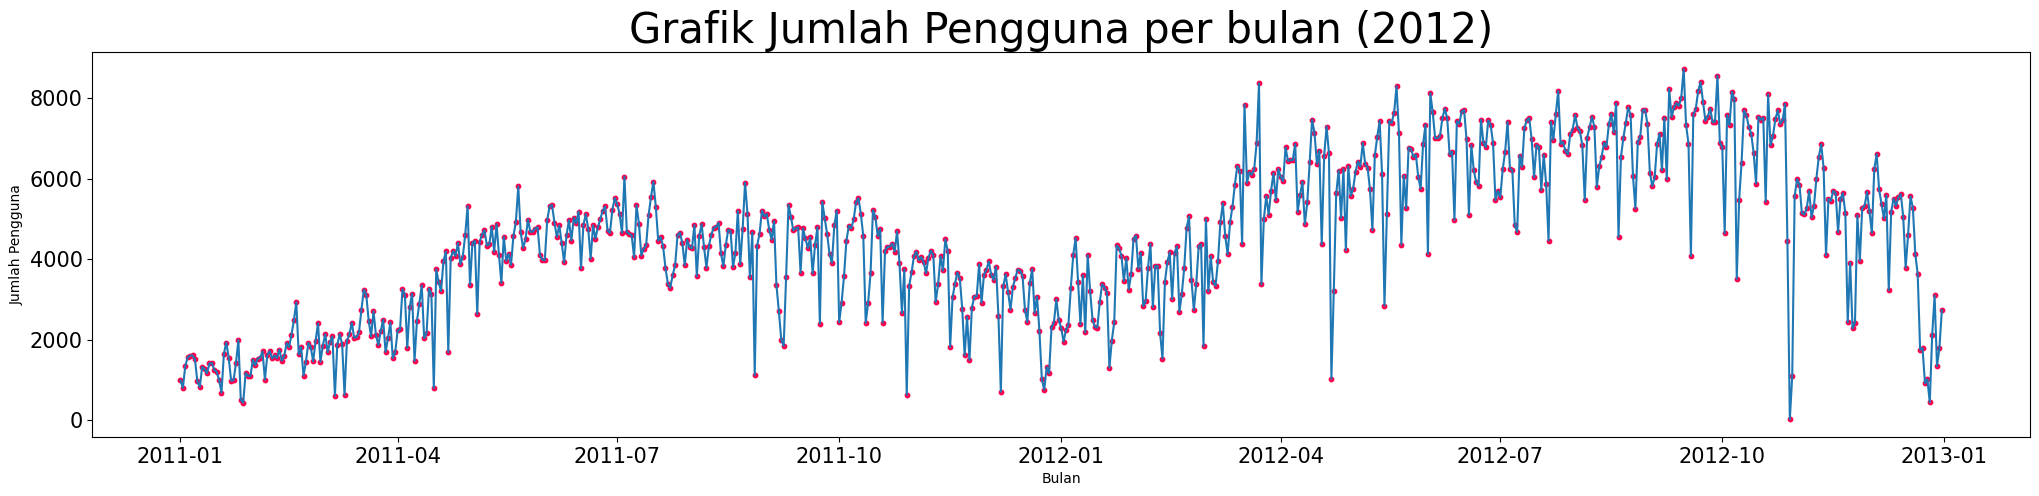

In [25]:
monthly_counts = day_df['cnt'].groupby(day_df['dteday']).max()

plt.figure(figsize=(25, 5))
plt.scatter(monthly_counts.index, monthly_counts.values, c="#FF004D", s=10, marker='o')
plt.plot(monthly_counts.index, monthly_counts.values)
plt.title("Grafik Jumlah Pengguna per bulan (2012)", loc="center", fontsize=30)
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pengguna")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

**Insight :** <br>
Berdasarkan grafik yang dihasilkan, terlihat bahwa jumlah pengguna cenderung meningkat pada bulan-bulan tertentu (misalnya, bulan Mei - Agustus) yang kemungkinan besar selama musim panas. Sebaliknya, grafik juga menunjukkan penuruan jumlah pengguna pada bulan-bulan teertentu, terutama di musim dingin (misalnya, bulan November - Maret).

### Pertanyaan 2 : Pada jam berapa pengguna paling sering dan paling jarang menyewa sepeda ?

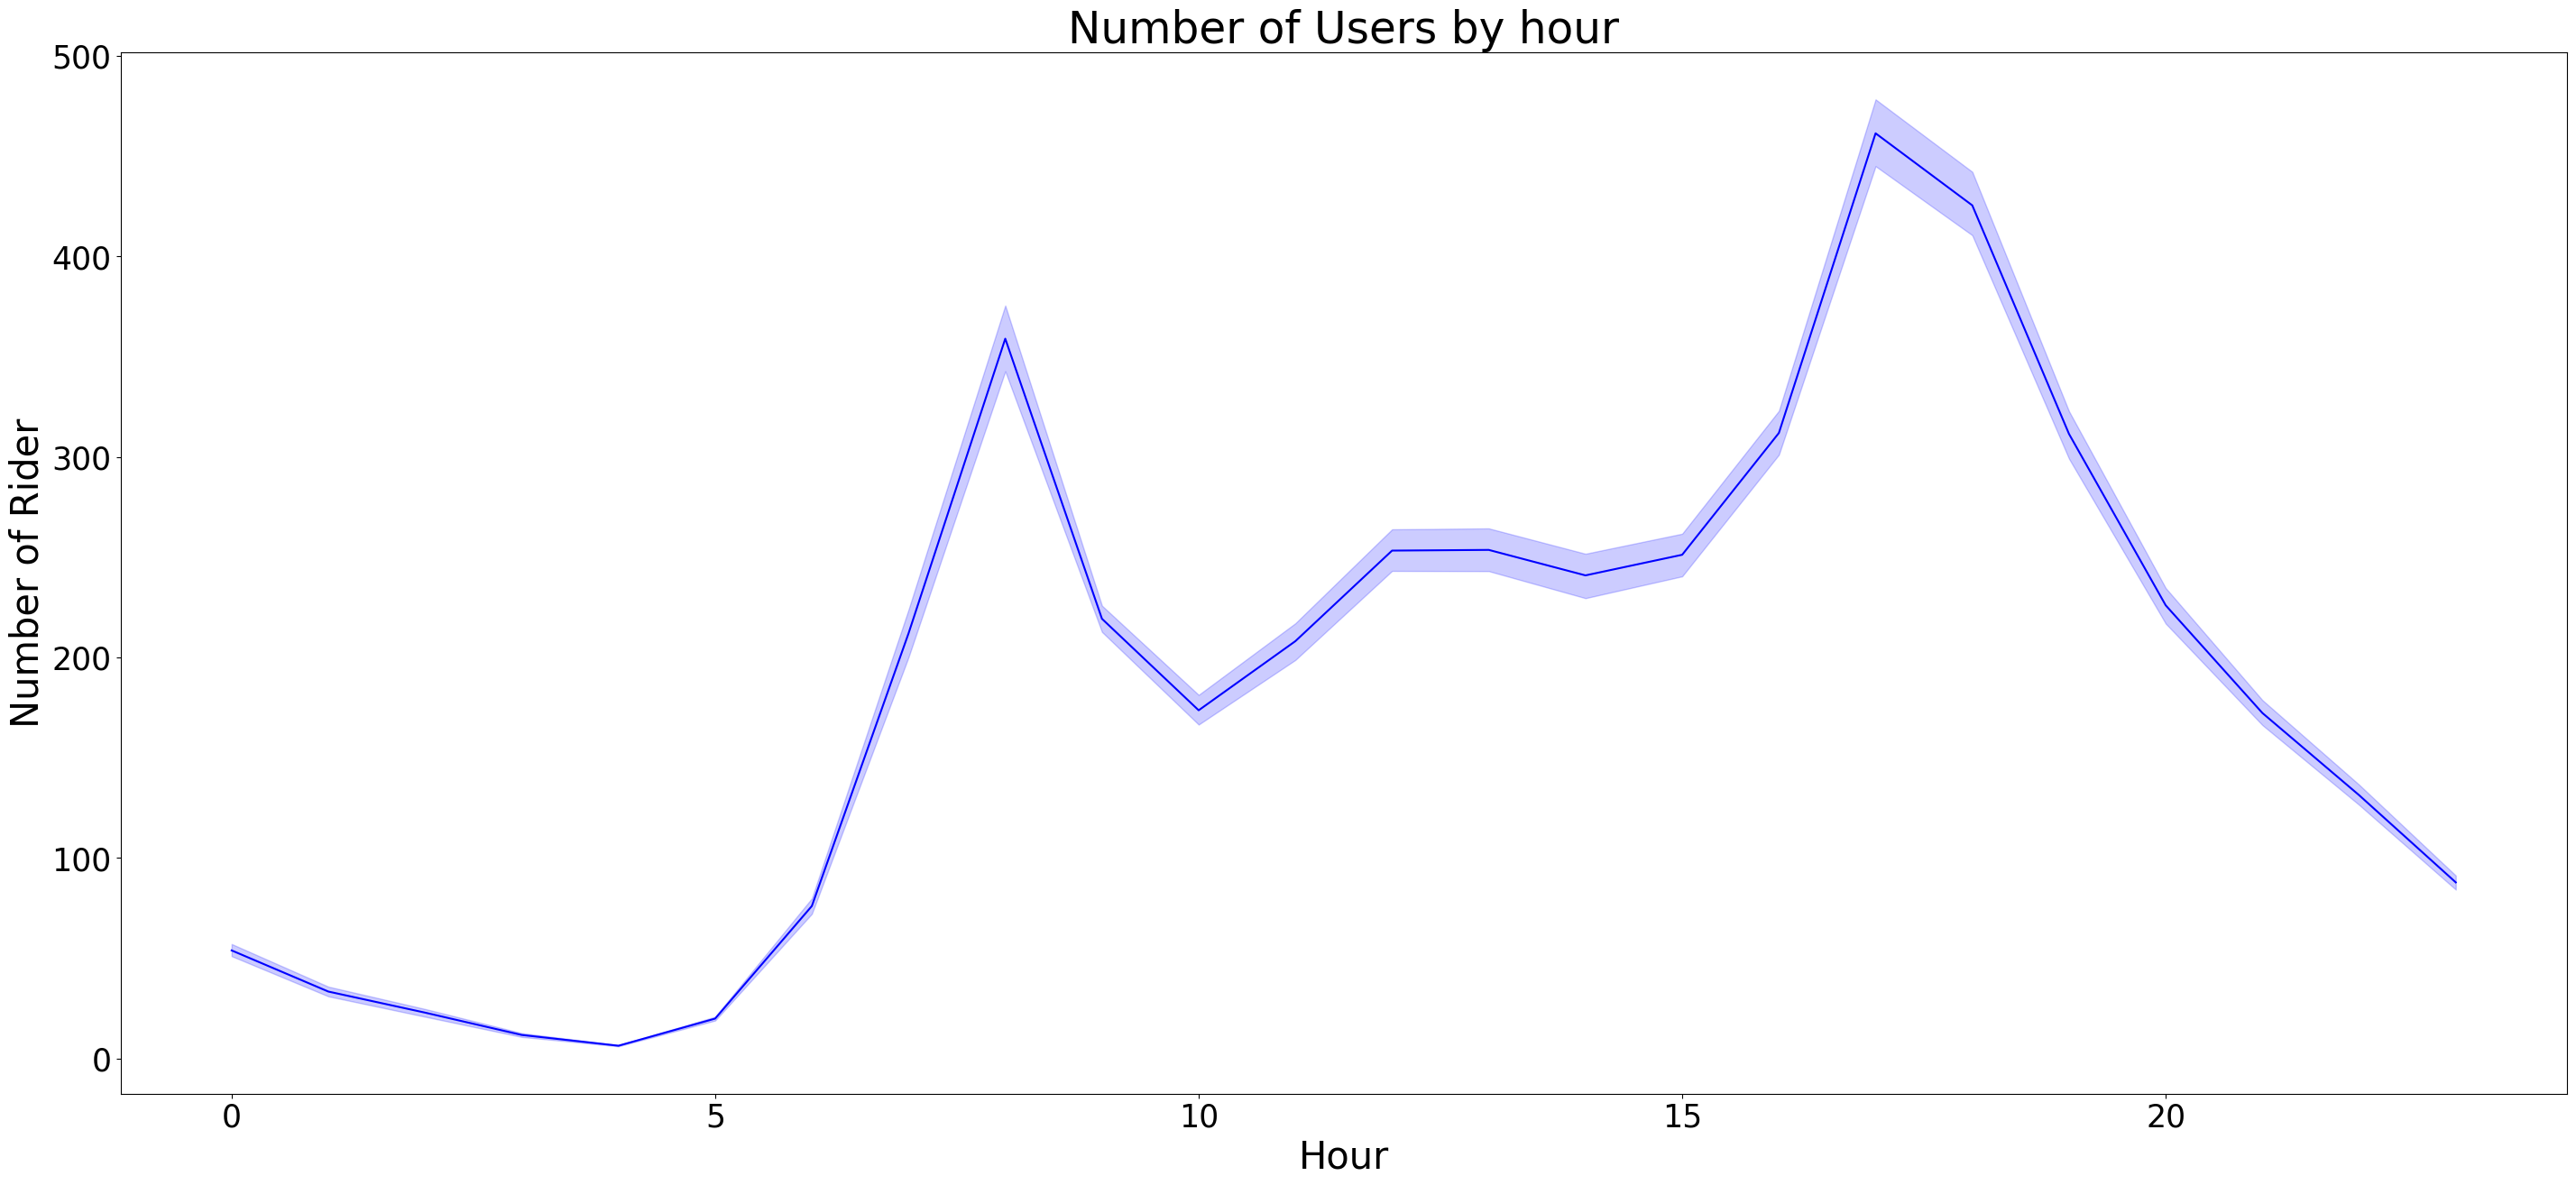

In [28]:
plt.figure(figsize=(35, 15))
sns.lineplot(data=hour_df, x='hours', y='cnt', color='blue')
plt.xlabel('Hour', fontsize=30)
plt.ylabel('Number of Rider', fontsize=30)
plt.title('Number of Users by hour', fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

Berdasarkan grafik di atas, terihat bahwa pengguna paling sering menyewa sepeda sekitar pukul 4 - 5 sore dengan 730 pengguna. Kontras dengan hal tersebut, penyewaan sepeda paling jarang sekitar pukul 3 - 4 pagi dengan 697 pengguna.

### Pertanyaan 3 : Apakah ada pola khusus dalam perilaku pelanggan terkait dengan perubahan suhu dan kelembapan?

## Analisis Lanjutan

### Binning Data

In [34]:
# Normalisasi data
hour_df['temp2'] = (hour_df['temp']) * 47 - 8
hour_df['hum2'] = (hour_df['hum']) * 100
hour_df['windspeed2'] = (hour_df['windspeed']) * 67

In [37]:
temp2_bins = np.linspace(hour_df['temp2'].min(), hour_df['temp2'].max(), 4)
temp2_labels = ['Cold', 'Mild', 'Hot']
hour_df['temp2_binned'] = pd.cut(hour_df['temp2'], bins=temp2_bins, labels=temp2_labels)

In [38]:
hum2_bins = np.linspace(hour_df['hum2'].min(), hour_df['hum2'].max(), 4)
hum2_labels = ['Low', 'Medium', 'High']
hour_df['hum2_binned'] = pd.cut(hour_df['hum2'], bins=hum2_bins, labels=hum2_labels)

In [39]:
categorical_columns = ['temp2_binned', 'hum2_binned']
mode_values = hour_df[categorical_columns].mode().iloc[0]
mode_values

,0
temp2_binned,Mild
hum2_binned,Medium


<ipython-input-54-0b3b5f9d6ba6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hour_df, x='temp2_binned', y='cnt', palette=['#EFDCAB', '#EFDCAB', '#D8D2C2'], ax=ax[0])
<ipython-input-54-0b3b5f9d6ba6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hour_df, x='hum2_binned', y='cnt', palette=['#D8D2C2', '#EFDCAB', '#EFDCAB'], ax=ax[1])


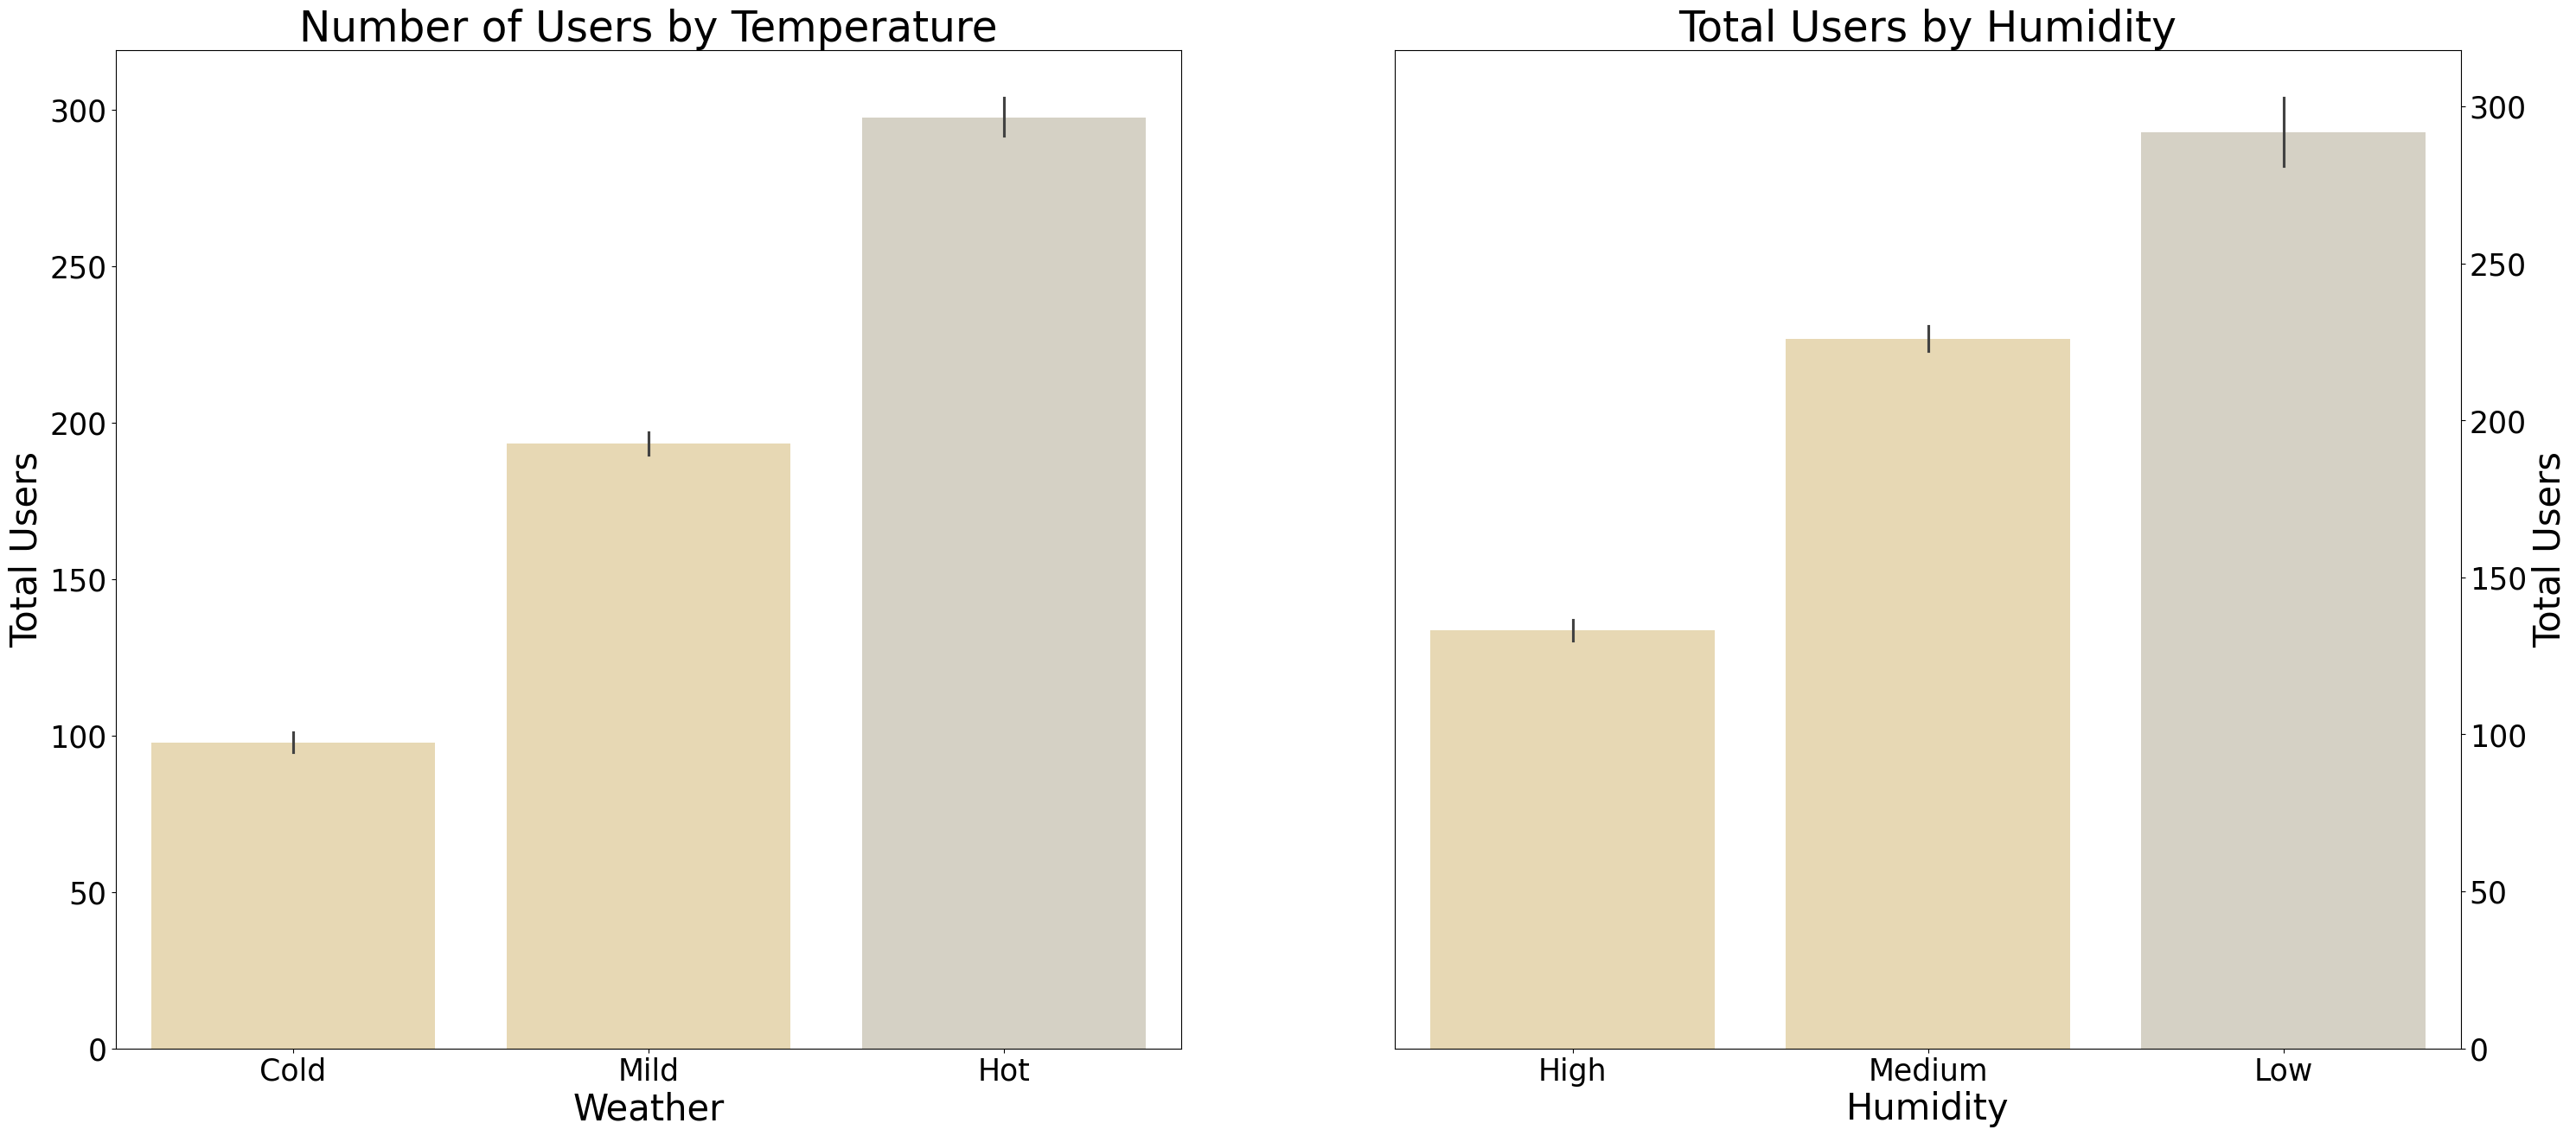

In [54]:
# Visualisasi Data
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

sns.barplot(data=hour_df, x='temp2_binned', y='cnt', palette=['#EFDCAB', '#EFDCAB', '#D8D2C2'], ax=ax[0])
ax[0].set_title('Number of Users by Temperature', fontsize=35)
ax[0].set_xlabel('Weather', fontsize=30)
ax[0].set_ylabel('Total Users', fontsize=30)
ax[0].tick_params(axis='both', labelsize=25)

sns.barplot(data=hour_df, x='hum2_binned', y='cnt', palette=['#D8D2C2', '#EFDCAB', '#EFDCAB'], ax=ax[1])
ax[1].set_title('Total Users by Humidity', fontsize=35)
ax[1].set_xlabel('Humidity', fontsize=30)
ax[1].set_ylabel('Total Users', fontsize=30)
ax[1].tick_params(axis='both', labelsize=25)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].invert_xaxis()

plt.show()

**Insight :** <br>
Suhu dan kelembapan memainkan peran penting. Jumlah pengguna tertinggi tercatat pada cuaca panas, diikuti oleh cuaca sedang dan dingin. Hal ini menunjukkan bahwa aktivitas pengguna meningkat seiring dengan meningkatnya suhu. Begitu juga, aktivitas pengguna tertinggi terlihat dalam kondisi kelembapan rendah, diikuti oleh kelembapan sedang dan tinggi. Ini berarti pengguna lebih aktif dalam lingkungan dengan kelembapan rendah.

## Conclusion

- Pertanyaan :
1. Bagaimana performa penyewaan sepeda dalam beberapa tahun terakhir?
2. Pada jam berapa pengguna paling sering dan paling jarang menyewa sepeda ?
3. Apakah ada pola khusus dalam perilaku pelanggan terkait dengan perubahan suhu dan kelembapan?

- Conclusion :
1. Berdasarkan grafik yang dihasilkan, terlihat bahwa jumlah pengguna cenderung meningkat pada bulan-bulan tertentu (misalnya, bulan Mei - Agustus) yang kemungkinan besar selama musim panas. Sebaliknya, grafik juga menunjukkan penuruan jumlah pengguna pada bulan-bulan teertentu, terutama di musim dingin (misalnya, bulan November - Maret).
2. Berdasarkan grafik di atas, terihat bahwa pengguna paling sering menyewa sepeda sekitar pukul 4 - 5 sore dengan 730 pengguna. Kontras dengan hal tersebut, penyewaan sepeda paling jarang sekitar pukul 3 - 4 pagi dengan 697 pengguna.
3. Suhu dan kelembapan memainkan peran penting. Jumlah pengguna tertinggi tercatat pada cuaca panas, diikuti oleh cuaca sedang dan dingin. Hal ini menunjukkan bahwa aktivitas pengguna meningkat seiring dengan meningkatnya suhu. Begitu juga, aktivitas pengguna tertinggi terlihat dalam kondisi kelembapan rendah, diikuti oleh kelembapan sedang dan tinggi. Ini berarti pengguna lebih aktif dalam lingkungan dengan kelembapan rendah.

In [55]:
hour_df.head()

,dteday,season,year,month,hours,holiday,one_of_week,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp2,hum2,windspeed2,temp2_binned,hum2_binned
0,2011-01-01,Spring,0,Jan,0,0,Saturday,1,0.24,0.2879,0.81,0.0,3,13,16,3.28,81.0,0.0,Cold,High
1,2011-01-01,Spring,0,Jan,1,0,Saturday,1,0.22,0.2727,0.80,0.0,8,32,40,2.34,80.0,0.0,Cold,High
2,2011-01-01,Spring,0,Jan,2,0,Saturday,1,0.22,0.2727,0.80,0.0,5,27,32,2.34,80.0,0.0,Cold,High
3,2011-01-01,Spring,0,Jan,3,0,Saturday,1,0.24,0.2879,0.75,0.0,3,10,13,3.28,75.0,0.0,Cold,High
4,2011-01-01,Spring,0,Jan,4,0,Saturday,1,0.24,0.2879,0.75,0.0,0,1,1,3.28,75.0,0.0,Cold,High


In [57]:
hour_df.to_csv("all_data.csv", index=False)